<a href="https://colab.research.google.com/github/alpinrp02/googleplaystore_rating_prediction/blob/main/googleplaystore_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [258]:
a = pd.read_csv('https://raw.githubusercontent.com/alpinrp02/googleplaystore_rating_prediction/main/googleplaystore.csv', usecols=['Rating', 'Installs'])
df = a.dropna()

In [259]:
df.sample(10)

,Rating,Installs
9400,4.4,"100,000+"
2361,4.5,"100,000+"
2318,4.2,"500,000+"
538,4.4,"500,000+"
3524,4.3,"100,000,000+"
1714,4.8,"10,000,000+"
1796,4.5,"1,000,000+"
7298,4.5,500+
2365,4.6,"1,000+"
8335,5.0,10+


In [260]:
df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [261]:
df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Free                 1
Name: Installs, dtype: int64

In [262]:
y = df['Rating'].values
y

array([4.1, 3.9, 4.7, ..., 5. , 4.5, 4.5])

In [263]:
x_old = df['Installs'].values
x_old

array(['10,000+', '500,000+', '5,000,000+', ..., '100+', '1,000+',
       '10,000,000+'], dtype=object)

In [264]:
x1 = [s.replace ("+","") for s in x_old]
x1 = [a.replace (",","") for a in x1]
x1 = [b.replace ("'","") for b in x1]
x1 = [c.replace ("Free","0") for c in x1]
#x1
x = np.asarray(x1, dtype=np.int64)
x

array([   10000,   500000,  5000000, ...,      100,     1000, 10000000])

Text(0, 0.5, 'Rating')

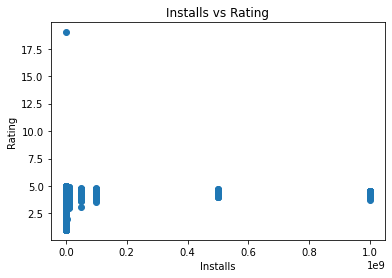

In [265]:
plt.scatter(x,y)
plt.title('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')

In [272]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

In [285]:
x_test=x_test.reshape(-1,1)
x_test


array([[100000000],
       [   100000],
       [  1000000],
       ...,
       [    10000],
       [100000000],
       [   100000]])

In [273]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x_train=x_train.reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Rating')

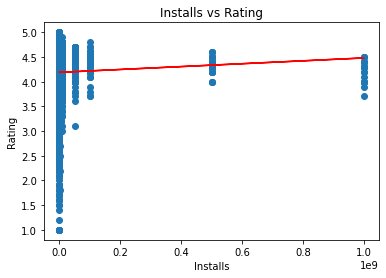

In [274]:
plt.scatter(x_train,y_train)
plt.plot(x_train, reg.predict(x_train), color='red')
plt.title('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

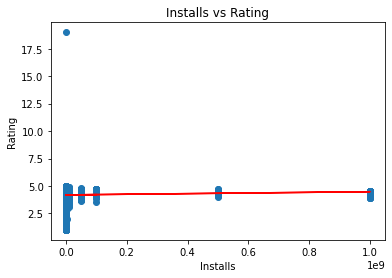

In [286]:
plt.scatter(x_test,y_test)
plt.plot(x_test, reg.predict(x_test), color='red')
plt.title('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')